**The Fringes of Fitness - 2019 Open Athletes**

M.K. - Project - BrainStation 

**EDA, data-wrangling steps:**

-	load packages,
-	load data,
-	check if all the columns we expect to see are present,
-	remove NaNs,
-	verify data types, 
-	check for duplicates,
-	visualize the findings,
-	save and create a .csv file for further processing.
    
**Specific checks:**
    
- 'height' from 1.20 to 2.50, 
- 'weight' - non-negative, all weight is measured in kgs,  
- 'gender' – no missing gender parameters,
- homogeneous data in each columns.  



In [2]:
# packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re


We will work from the Google Drive - if you work from the local machine, you may want to adjust the below commands to let the datasets load from your local drive.

In [3]:
# mount google drive and load the data 

from google.colab import drive
drive.mount('/content/drive')

df_2019_games_athletes = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2019_games_athletes.csv")
df_2019_opens_athletes = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2019_opens_athletes.csv")
df_2020_opens_scores = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2020_opens_athletes.csv")


Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# EDA and Data Wrangling

In [4]:
# make a reserve copy for emergency use 

df_2019_opens_athletes_new = df_2019_opens_athletes.copy()

Visually inspect the data. 

In [5]:
df_2019_opens_athletes

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,Samantha Briggs,Samantha,Briggs,accepted,F,0e63d-P2536_14-184.jpg,GB,United Kingdom,19,4098,CrossFit Black Five,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,Renata Pimentel,Renata,Pimentel,accepted,F,04e97-P485089_5-184.jpg,BR,Brazil,19,15868,CrossFit Gurkha,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,Carleen Mathews,Carleen,Mathews,NaN,F,b663a-P16973_6-184.jpg,US,United States,19,10471,CrossFit Saint Helens,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,Danila Capaccetti,Danila,Capaccetti,NaN,F,pukie.png,IT,Italy,19,9329,CrossFit Black Shark,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,Hope Cicero,Hope,Cicero,NaN,F,f204b-P313257_1-184.jpg,US,United States,19,438,CrossFit Billings,36,1.55,61.23,5,176,0,Women (35-39)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572648,546539,Jean Lyon,Jean,Lyon,NaN,F,c824f-P546539_1-184.jpg,US,United States,4,231,CrossFit SAC,49,NaN,NaN,2864,11216,1,Women (45-49)
572649,1531656,Lynnell Aoki,Lynnell,Aoki,NaN,F,pukie.png,US,United States,4,7716,CrossFit Kuleana,48,NaN,NaN,2866,11224,1,Women (45-49)
572650,1338870,Lissa Samudio,Lissa,Samudio,NaN,F,2d09b-P1338870_1-184.jpg,PY,Paraguay,4,0,NaN,45,NaN,NaN,2866,11224,1,Women (45-49)
572651,1172138,Darlene Rushing,Darlene,Rushing,NaN,F,07e0e-P1172138_1-184.jpg,US,United States,4,13232,FireTower CrossFit,49,1.70,70.31,2868,11227,1,Women (45-49)


Let's check for duplicated values - none!

In [6]:
# show a sum of duplicated values 

df_2019_opens_athletes.duplicated(keep=False).sum()

0

The below schema will be used to ensure that all the columns that we expect to have are indeed present.

In [7]:
# expected schema 

schema_exp_2019_opens_athletes = {'height': float, 'affiliateid': np.int64,
             'countryoforiginname': object,
             'weight': float,
             'affiliatename': object,
              'divisionid':  np.int64,
             'postcompstatus' : object,
             'profilepics3key': object,
             'competitorid': np.int64,
             'firstname': object,
             'gender': object,
              'is_scaled': np.int64,
             'lastname': object,
             'age': np.int64,
             'countryoforigincode': object,
             'competitorname': object,
             'overallrank': np.int64,
             'overallscore': np.int64,
             'division': object}

Create a function to run the check of the schema.

In [8]:
# check columns

def schema_checker(df_2019_opens_athletes, schema_exp_2019_opens_athletes):
    for i in schema_exp_2019_opens_athletes:
        if i not in df_2019_opens_athletes.columns:
            print(f'"{i}" not found in dataset.')
            
        else:
            print(f'"{i}" is found.')


Print the result of the check and see if any discrepancies are discovered. 

In [9]:
print(schema_checker(df_2019_opens_athletes, schema_exp_2019_opens_athletes))

"height" is found.
"affiliateid" is found.
"countryoforiginname" is found.
"weight" is found.
"affiliatename" is found.
"divisionid" is found.
"postcompstatus" is found.
"profilepics3key" is found.
"competitorid" is found.
"firstname" is found.
"gender" is found.
"is_scaled" is found.
"lastname" is found.
"age" is found.
"countryoforigincode" is found.
"competitorname" is found.
"overallrank" is found.
"overallscore" is found.
"division" is found.
None


All the items of the schema are present.

Below, check if the info of the dataset. From the below, we see that there are major issues with the missing values in certain columns, i.e., 'postcompstatus'. 

In [10]:
df_2019_opens_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572653 entries, 0 to 572652
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   competitorid         572653 non-null  int64  
 1   competitorname       572653 non-null  object 
 2   firstname            572653 non-null  object 
 3   lastname             572653 non-null  object 
 4   postcompstatus       302 non-null     object 
 5   gender               572653 non-null  object 
 6   profilepics3key      572653 non-null  object 
 7   countryoforigincode  572348 non-null  object 
 8   countryoforiginname  572653 non-null  object 
 9   divisionid           572653 non-null  int64  
 10  affiliateid          572653 non-null  int64  
 11  affiliatename        540821 non-null  object 
 12  age                  572653 non-null  int64  
 13  height               304823 non-null  float64
 14  weight               323754 non-null  float64
 15  overallrank      

Create a visual to check for the missing values - they are present in 4 columns, which include 'postcompstatus', 'affiliatename', 'height' and 'weight'.

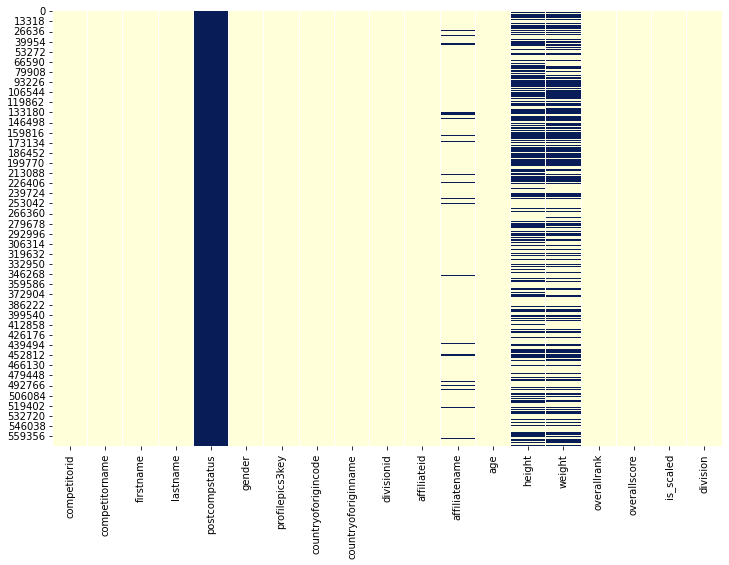

In [11]:
# plot the missing data points 

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_2019_opens_athletes.isnull(), cbar=False, cmap = 'YlGnBu')
plt.show() # missing data in postcompstatus, affiliatename, height, weight 

Let's create a function that formally checks for NaNs in the data set.

In [12]:
# check nans

def nan_checker(df_2019_opens_athletes): 

    summary = {}
    # are there any nan values?
    any_nans = df_2019_opens_athletes.isna().any().any()
    
    summary['NaNs Exist'] = any_nans
    
    # how many?
    n_nans = df_2019_opens_athletes.isna().sum().sum()
    summary['NaN Count'] = n_nans
    
    # which variables do they come from
    nan_column_series = df_2019_opens_athletes.isna().sum()
    nan_column_names = list(nan_column_series[nan_column_series > 0].index)
    
    summary['NaN Containing Columns'] = nan_column_names
    
    
    # any variables with more than 50% of data missing?
    nan_column_percent = 100 * nan_column_series/df_2019_opens_athletes.shape[0]
    nan_columns_with_more_than_50_pct = list(nan_column_percent[nan_column_percent > 50].index)
    
    summary['NaNs More Than 50%'] = nan_columns_with_more_than_50_pct
    
    #summary can be all the info about nans
    return(summary)

Print out the name of the columns in which the NaNs are present and count their numbers.

In [13]:
# show NaNs stats

print(nan_checker(df_2019_opens_athletes)) # same picture as revealed by the heatmap above

{'NaNs Exist': True, 'NaN Count': 1121217, 'NaN Containing Columns': ['postcompstatus', 'countryoforigincode', 'affiliatename', 'height', 'weight'], 'NaNs More Than 50%': ['postcompstatus']}


Examine the missing 'affiliateid' values.

In [14]:
# missing 'affiliateid' - show rows 

print(df_2019_opens_athletes[df_2019_opens_athletes['affiliatename'].isnull()])

        competitorid      competitorname  ... is_scaled       division
44             17329   Marlene Andersson  ...         0  Women (35-39)
56            760350    Yolanda Stivalys  ...         0  Women (35-39)
63            252989       Amelie Verret  ...         0  Women (35-39)
79           1119795  Jessica Borg Ghigo  ...         0  Women (35-39)
84           1026233  Svitlana Kropyvets  ...         0  Women (35-39)
...              ...                 ...  ...       ...            ...
572578       1637756      Cheryl Goodman  ...         1  Women (45-49)
572584       1649029     Kara Bassignani  ...         1  Women (45-49)
572589       1612907   Christina Presley  ...         1  Women (45-49)
572629       1570621   Stephanie Nazzaro  ...         1  Women (45-49)
572650       1338870       Lissa Samudio  ...         1  Women (45-49)

[31832 rows x 19 columns]


Fill the missing 'affiliatename' with zeros from 'affiliateid'. It will help us to later replace the zeros with None.

In [15]:
# fillinf affiliate name with zeros (0) from affiliate id

df_2019_opens_athletes['affiliatename'].fillna(df_2019_opens_athletes['affiliateid'], inplace=True)

Ensure that the affiliate names and the affiliate ids are missing at the same time. The below shows that they are.

In [16]:
# the number of NaNs is the same as the number of 0 in affiliate IDs. We conclude they miss at the same time.

missing_affiliatename_affiliateid = df_2019_opens_athletes[df_2019_opens_athletes['affiliatename']==df_2019_opens_athletes['affiliateid']]
result_missing_affiliatename_affiliateid = missing_affiliatename_affiliateid[['affiliatename','affiliateid']].isnull().count()
print(result_missing_affiliatename_affiliateid) # all missing names replaced with 0

affiliatename    31832
affiliateid      31832
dtype: int64


Replace the zeros with 'None' for the consistency of data types.

In [17]:
#replace all 0 with 'None' for naming consistency

df_2019_opens_athletes['affiliatename'] = df_2019_opens_athletes['affiliatename'].replace({0: "None"})

Check that all the zeros were replaced - they have.

In [18]:
# replace 0 with None for consistency

(df_2019_opens_athletes['affiliatename'] == "None").sum() # matches the above figure

31832

Check if any missing values remain - none.

In [19]:
# affiliate name is dealt with 

df_2019_opens_athletes['affiliatename'].isnull().sum() # no missing affiliate names remain

0

Run the nan_checker to see what missing values remain - ['postcompstatus', 'countryoforigincode', 'height', 'weight'].

In [20]:
# check for remaining missing values 

print(nan_checker(df_2019_opens_athletes)) # missing values remain in 'postcompstatus', 'countryoforigincode', 'height', 'weight'

{'NaNs Exist': True, 'NaN Count': 1089385, 'NaN Containing Columns': ['postcompstatus', 'countryoforigincode', 'height', 'weight'], 'NaNs More Than 50%': ['postcompstatus']}


Deal with the missing country of origin code: missing 305 instances. 

In [21]:
# missing the country of origin 

print(df_2019_opens_athletes[df_2019_opens_athletes['countryoforigincode'].isnull()])

        competitorid           competitorname  ... is_scaled       division
209           470687           Francie Gerber  ...         0  Women (35-39)
1081         1399355           Marlinda Lucas  ...         0  Women (35-39)
3611          994591          Alana Johnstone  ...         0  Women (35-39)
4444          961428              Rykie Jonck  ...         0  Women (35-39)
6033          585514  Jeane-Marie van Heerden  ...         0  Women (35-39)
...              ...                      ...  ...       ...            ...
564007       1603574        Karen Bartholomae  ...         0  Women (45-49)
566078       1638307            Leoni Lacante  ...         0  Women (45-49)
567175       1562130          Michelle Pilzer  ...         0  Women (45-49)
569599       1595201         Elaine Potgieter  ...         0  Women (45-49)
570967       1562130          Michelle Pilzer  ...         1  Women (45-49)

[305 rows x 19 columns]


Correct for Namibia - problem solved. 

**Observation** - Jupyter reads NA as NAN, hence, a 'NaN' error.

In [22]:
# we found that the missing countryoforigin code petrained to, among others, Namibia. We filled in the NaNs with 'NA' and it appears that that was the only missing country code.

df_2019_opens_athletes.loc[df_2019_opens_athletes['countryoforiginname'] == 'Namibia', 'countryoforigincode'] = 'NAM' 

Check the postcopmpstatus. We know that 281 qualified for the games (or, 282 if we include Roman Khrennikov who was denied a US visa). Chantelle Loehner was banned due to breach of drug use policies. 572351 values are missing.

In [23]:
# show the null values in 'postcompstatus' 

print(df_2019_opens_athletes[df_2019_opens_athletes['postcompstatus'].isnull()])

        competitorid     competitorname  ... is_scaled       division
2              16973    Carleen Mathews  ...         0  Women (35-39)
3             751083  Danila Capaccetti  ...         0  Women (35-39)
4             313257        Hope Cicero  ...         0  Women (35-39)
5             121354     Corrin Lemieux  ...         0  Women (35-39)
6             841247   Andreia Pinheiro  ...         0  Women (35-39)
...              ...                ...  ...       ...            ...
572648        546539          Jean Lyon  ...         1  Women (45-49)
572649       1531656       Lynnell Aoki  ...         1  Women (45-49)
572650       1338870      Lissa Samudio  ...         1  Women (45-49)
572651       1172138    Darlene Rushing  ...         1  Women (45-49)
572652        550423        Jenna Jones  ...         1  Women (45-49)

[572351 rows x 19 columns]


Based on the above, we change NaNs to 'not accepted' and 'invited' to 'not accepted' and 'declined' to 'not accepted'. Obviously, those athletes who 'declined' the invite didn't participate in the games.

In [24]:
# run a replacement function to correct for the statuses - declined to not accepted and invited to not accepted.

df_2019_opens_athletes['postcompstatus'] = df_2019_opens_athletes['postcompstatus'].replace({'declined': 'not accepted', 'invited': 'not accepted'})


Fill the rest of the missing values with 'not accepted' now that we know that the 'accepted' ones have been correctly identified and marked.

In [25]:
df_2019_opens_athletes['postcompstatus'] = df_2019_opens_athletes['postcompstatus'].fillna('not accepted')

Check the remaining missing values - 'height', 'weight' and no other.

In [26]:
print(nan_checker(df_2019_opens_athletes)) # after the above manipulations, the only missing values are in 'height', 'weight'. 

{'NaNs Exist': True, 'NaN Count': 516729, 'NaN Containing Columns': ['height', 'weight'], 'NaNs More Than 50%': []}


To complete the height and weight columns, let's use the median values for the athletes who participated in the games. For height, we should replace the nonsensical height values with medians that are reasonable for fit humans. Empirically, we've discovered that fit humans shorter than 1.3 aren't frequent, and those who are taller than 2.1 are also not frequent, so we will replace those extreme values with median values. 

In [27]:
# let's replace nonsensical heights with NaNs

df_2019_opens_athletes.loc[(df_2019_opens_athletes['height'] < 1.3), ['height']] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['height'] < 1.3), ['height']].fillna(np.nan, inplace = True)
df_2019_opens_athletes.loc[(df_2019_opens_athletes['height'] > 2.1), ['height']] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['height'] > 2.1), ['height']].fillna(np.nan, inplace = True)

Use the median from the initial file for 2019 games (because we know there isn't a large amount of missing values) and run functions to replace the missing values with the median value.

In [28]:
for_mean_df = pd.read_csv(r"/content/drive/MyDrive/The_Fringes_of_Fitness/CrossFit_Data_Sets_2019_2020/2019_games_athletes.csv")

In [29]:
height_median_men = for_mean_df[for_mean_df['gender'] == 'M']['height'].median()

In [30]:
height_median_women = for_mean_df[for_mean_df['gender'] == 'F']['height'].median()

In [31]:
weight_median_men = for_mean_df[for_mean_df['gender'] == 'M']['weight'].median()

In [32]:
weight_median_women = for_mean_df[for_mean_df['gender'] == 'F']['weight'].median()

In [33]:
df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'F'), ['weight']] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'F'), ['weight']].fillna(weight_median_women)

In [34]:
df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'M'), ['weight']] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'M'), ['weight']].fillna(weight_median_men)

In [35]:
df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'F'), ['height']] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'F'), ['height']].fillna(height_median_women)

In [36]:
df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'M'), ['height']] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['gender'] == 'M'), ['height']].fillna(height_median_men)

After the above commands replace all the missing values - we will check them again using the nan_checker - no missing values left.

In [37]:
print(nan_checker(df_2019_opens_athletes))

{'NaNs Exist': False, 'NaN Count': 0, 'NaN Containing Columns': [], 'NaNs More Than 50%': []}


Now, we removed all the NaNs. We will pass to verifying the data types.

In [38]:
# data types 

df_2019_opens_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572653 entries, 0 to 572652
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   competitorid         572653 non-null  int64  
 1   competitorname       572653 non-null  object 
 2   firstname            572653 non-null  object 
 3   lastname             572653 non-null  object 
 4   postcompstatus       572653 non-null  object 
 5   gender               572653 non-null  object 
 6   profilepics3key      572653 non-null  object 
 7   countryoforigincode  572653 non-null  object 
 8   countryoforiginname  572653 non-null  object 
 9   divisionid           572653 non-null  int64  
 10  affiliateid          572653 non-null  int64  
 11  affiliatename        572653 non-null  object 
 12  age                  572653 non-null  int64  
 13  height               572653 non-null  float64
 14  weight               572653 non-null  float64
 15  overallrank      

Create a data-type checker function.

In [39]:
# checker of data types in columns

def dtype_checker(df_2019_opens_athletes, schema_exp_2019_opens_athletes):
    for column,dtype in schema_exp_2019_opens_athletes.items():
        if column in df_2019_opens_athletes.columns:
            if df_2019_opens_athletes[column].dtype != dtype:
                print(f'"{column}" does not match dtype "{dtype}"')
           # column doesn't match the expected data type
        else:
            print(f'{column} matches the expected data type.')

Run the newly created data-type checker function - all data types match our expectations set in the schema above.

In [40]:
# all data types match our expectation

dtype_checker(df_2019_opens_athletes, schema_exp_2019_opens_athletes)

View the dataset to see how it looks now.

In [41]:
# view the dataset as is now 

df_2019_opens_athletes

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,Samantha Briggs,Samantha,Briggs,accepted,F,0e63d-P2536_14-184.jpg,GB,United Kingdom,19,4098,CrossFit Black Five,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,Renata Pimentel,Renata,Pimentel,accepted,F,04e97-P485089_5-184.jpg,BR,Brazil,19,15868,CrossFit Gurkha,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,Carleen Mathews,Carleen,Mathews,not accepted,F,b663a-P16973_6-184.jpg,US,United States,19,10471,CrossFit Saint Helens,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,Danila Capaccetti,Danila,Capaccetti,not accepted,F,pukie.png,IT,Italy,19,9329,CrossFit Black Shark,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,Hope Cicero,Hope,Cicero,not accepted,F,f204b-P313257_1-184.jpg,US,United States,19,438,CrossFit Billings,36,1.55,61.23,5,176,0,Women (35-39)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572648,546539,Jean Lyon,Jean,Lyon,not accepted,F,c824f-P546539_1-184.jpg,US,United States,4,231,CrossFit SAC,49,1.68,64.90,2864,11216,1,Women (45-49)
572649,1531656,Lynnell Aoki,Lynnell,Aoki,not accepted,F,pukie.png,US,United States,4,7716,CrossFit Kuleana,48,1.68,64.90,2866,11224,1,Women (45-49)
572650,1338870,Lissa Samudio,Lissa,Samudio,not accepted,F,2d09b-P1338870_1-184.jpg,PY,Paraguay,4,0,None,45,1.68,64.90,2866,11224,1,Women (45-49)
572651,1172138,Darlene Rushing,Darlene,Rushing,not accepted,F,07e0e-P1172138_1-184.jpg,US,United States,4,13232,FireTower CrossFit,49,1.70,70.31,2868,11227,1,Women (45-49)


Check if there any negative values for in the weight column - none.

In [42]:
# check weight - non-negative 

if df_2019_opens_athletes['weight'].values.all() > 0:        
    print("TRUE")
else:
    print("FALSE")
    

TRUE


Check if there are nay negative height values - none.

In [43]:
# check height - non-negative 

if df_2019_opens_athletes['height'].values.all() > 0:        
    print("TRUE")
else:
    print("FALSE")
    

TRUE


Check if there are any negative age values - none.

In [44]:
# check age - non-negative 

if df_2019_opens_athletes['age'].values.all() > 0:        
    print("TRUE")
else:
    print("FALSE")

TRUE


Check if there are any height values that are outside the reasonable range for a fit athlete. 

In [45]:
# now, the height is in the range of 1.3 to 2.1 - perfect! none is outside of the range [1.3;2.1]

((df_2019_opens_athletes['height'].values < 1.3).any() or (df_2019_opens_athletes['height'].values > 2.1).any())

False

Check the remaining NaNs - none.

In [46]:
print(nan_checker(df_2019_opens_athletes))

{'NaNs Exist': False, 'NaN Count': 0, 'NaN Containing Columns': [], 'NaNs More Than 50%': []}


## Normalization of weight, height and age.

Let's observe the distribution of height for men and women - no abnormalities discovered after we've performed correction for those values.

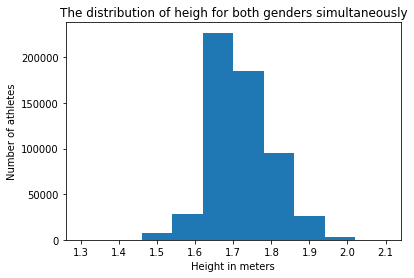

In [47]:
# height distribution - men and women 

plt.figure()
plt.hist(df_2019_opens_athletes.height)
plt.title('The distribution of heigh for both genders simultaneously')
plt.ylabel('Number of athletes')
plt.xlabel('Height in meters')
plt.show()

Let's check the age distribution among the athletes - too many athletes claiming their age to be 80 and above. We should investigate it at a deeper level.

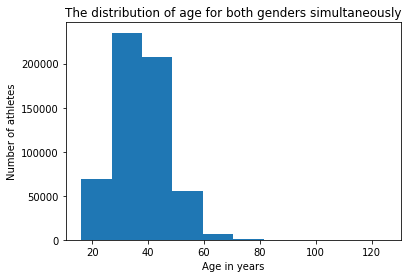

In [48]:
# age normalization - men and women 

plt.figure()
plt.hist(df_2019_opens_athletes.age)
plt.title('The distribution of age for both genders simultaneously')
plt.ylabel('Number of athletes')
plt.xlabel('Age in years')
plt.show()

Let's see how age is distributed after 60. It shows us that after the age of 80, the number of people in older categories becomes smaller or even nonsensical.


In [49]:
# let's see how age is distributed after 60

df_2019_opens_athletes.loc[(df_2019_opens_athletes['age'] > 60,['age'])].value_counts().sort_values(ascending=False)


age
61     1031
62      912
63      728
64      597
65      475
66      420
67      376
68      263
69      193
70      166
71      144
72      130
73       82
74       51
75       42
76       42
79       18
77       15
78       14
80       11
81       10
124       3
86        3
88        3
125       2
82        2
83        2
101       1
dtype: int64

It is nonsensical to believe that there are athletes who participate in the opens at the age of 100+. That's why we will force the cap to be at 80 years old. Although we believe some athletes might be older than that, but their number is small and it will not impact the outcomes of the models significantly.

In [50]:
# forcing the max age to be capped at 80

df_2019_opens_athletes.loc[(df_2019_opens_athletes['age'] > 80,['age'])] = 80

df_2019_opens_athletes.loc[(df_2019_opens_athletes['age'] > 60,['age'])].value_counts().sort_values(ascending=False)


age
61     1031
62      912
63      728
64      597
65      475
66      420
67      376
68      263
69      193
70      166
71      144
72      130
73       82
74       51
75       42
76       42
80       37
79       18
77       15
78       14
dtype: int64

Let's see the normalized age distribution - wonderful!

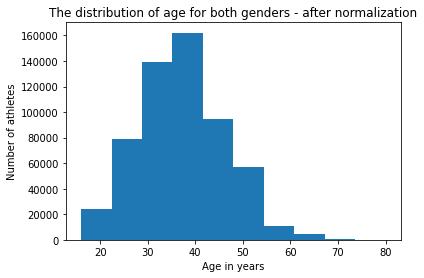

In [51]:
# normalized age

plt.figure()
plt.hist(df_2019_opens_athletes.age)
plt.title('The distribution of age for both genders - after normalization')
plt.ylabel('Number of athletes')
plt.xlabel('Age in years')
plt.show()

Let's check the distribution of weight - the initial plot shows that there are significant problems with the data accuracy in the column.

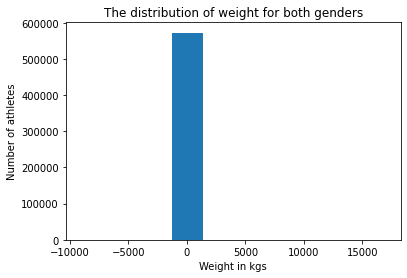

In [52]:
# weight

plt.figure()
plt.hist(df_2019_opens_athletes.weight)
plt.title('The distribution of weight for both genders')
plt.ylabel('Number of athletes')
plt.xlabel('Weight in kgs')
plt.show()

Let's try to sort out nonsensical values, i.e., those that are higher than 110 - because it is hard to imagine a fit athlete participating in the games is he/she is heavier than 110 kg. If the figure is larger - we can imagine that the athlete indicated the weight in pounds. 

In [53]:
#let's see how weight is distributed - manually play with the weights trying to find a threshold of Ridiculousness

df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] > 110,['weight'])].value_counts().sort_values(ascending=False)

weight  
113.40      997
111.13      974
115.67      507
117.93      499
120.20      421
           ... 
151.50        1
317.51        1
542.04        1
507.12        1
16960.00      1
Length: 216, dtype: int64

Let's imagine that it is extremely unlikely that anyone heavier than 300 pounds (or kilos) would participate in the opens. Let's replace the higher values with the median weight in kgs respectively for men and women. 

In [54]:
# assuming that people whose weight is more than 300 have made a fat finger error. Correct that to median per gender.

df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] > 300,['weight'])] = weight_median_men

Assuming that people whose weight is 170 or more have indicated their weight in lbs. Convert that weight to kgs. 

In [55]:
# convert pounds to kgs 

df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] > 170,['weight'])] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] > 170,['weight'])] * 0.453592

Analyze the median weights for men and women in the US - to give us a sense of what a median weight of an athlete might be.

In [56]:
# median weight - men and women - USA

us_weight = df_2019_opens_athletes.groupby(['countryoforiginname', 'gender'])['weight'].mean()
df_us_weight = pd.DataFrame(data=us_weight)

df_us_weight.query("countryoforiginname == 'United States'")

weight
countryoforiginname gender           
United States       F       65.002310
                    M       87.169113

It is clear that most people whose weight is 120+ are from the US and Canada. It indicates that they indicated their weight in lbs. We convert that to kgs.

In [57]:
# weight in pounds to kgs for those who are 'heavier' than 120

df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] > 120,['weight'])] = df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] > 120,['weight'])] * 0.453592

We continue our analysis of the weight column. To correct the weights - let's  convert the weight of women > 90 to the average weight of women in kgs, and the same for men weighing 110+. Clearly, those weights are abnormally high for CrossFit participants - let's assume that their actual weight is equal to the median for their respective gender.

In [58]:
# forcing the max weight for men and women 

df_2019_opens_athletes['weight'] = np.where((df_2019_opens_athletes['weight'] > 90) & (df_2019_opens_athletes['gender'] == 'F'), weight_median_women, df_2019_opens_athletes['weight'])
df_2019_opens_athletes['weight'] = np.where((df_2019_opens_athletes['weight'] > 110) & (df_2019_opens_athletes['gender'] == 'M'), weight_median_men, df_2019_opens_athletes['weight'])



Now that we have regularized the upper distribution of weight, let's address the lower part of the distribution. 

Let's examine the minimums. We manually play with the weights trying to find a 'threshold of nonsense'. It looks like there are some ridiculous weights indicated, but we cannot identify which those are. 

In [59]:
# attempt to find nonsense weights 

df_2019_opens_athletes.loc[(df_2019_opens_athletes['weight'] < 50,['weight'])].value_counts().sort_values(ascending=False)

weight  
 49.90      871
 47.63      460
 48.00      245
 49.00      243
 48.99      238
           ... 
 13.00        1
 8.16         1
 6.00         1
-3599.71      1
 13.61        1
Length: 110, dtype: int64

Let's force the weights less than 40 and 50 kg for women and men respectively to medians. It is hard to imagine fit men and women weighing less than that.

In [60]:
# we will force the minimums that are below the reasonable minimums
df_2019_opens_athletes['weight'] = np.where((df_2019_opens_athletes['weight'] < 40) & (df_2019_opens_athletes['gender'] == 'F'), weight_median_women, df_2019_opens_athletes['weight'])
df_2019_opens_athletes['weight'] = np.where((df_2019_opens_athletes['weight'] < 50) & (df_2019_opens_athletes['gender'] == 'M'), weight_median_men, df_2019_opens_athletes['weight'])


Let's examine how the entire distribution of weight has changed now after the above manipulations. We expect it to be from 40 (min weight for women) all up to 110 (the max weight for men) - we've achieved our goal.

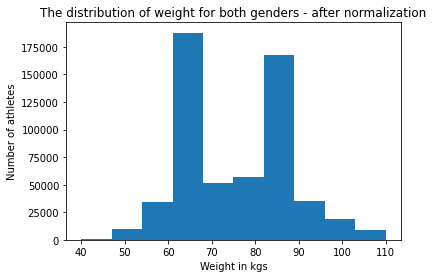

In [61]:
# weight - normalized - this double head indicates the gender specificity, which is a good sign of successful normalization 

plt.figure()
plt.hist(df_2019_opens_athletes.weight)
plt.title('The distribution of weight for both genders - after normalization')
plt.ylabel('Number of athletes')
plt.xlabel('Weight in kgs')
plt.show()

Let's see how many men and women have competed in the opens across all the divisions.

In [62]:
# check the gender groupings 

gender1 = df_2019_opens_athletes.groupby('gender').count()
gender1

,competitorid,competitorname,firstname,lastname,postcompstatus,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
gender,,,,,,,,,,,,,,,,,,
F,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422,255422
M,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231,317231


We have found out that 44.6% of the participants are recorded as females and 55.4% are males.

In [63]:
F_percent = round(gender1.at['F','height']/(gender1['competitorid'].sum())*100,2)
M_percent = (100 - F_percent)
print(f'{F_percent}% of the participants are recorded as females and {M_percent}% are males.')

44.6% of the participants are recorded as females and 55.4% are males.


## Univariate analysis 

To perform the analysis, let's identify the columns that contain numerical and categorical variables.

In [64]:
# variables 

num_var_2019_opens_athletes = ['height', 'weight', 'age', 'overallscore', 'overallrank', 'divisionid']
cat_var_2019_opens_athletes = [ 'countryoforiginname', 'affiliatename', 'is_scaled', 'division']
other = ['competitorname']

Let's plot categorical variables.

The countries from which most of athletes come are the US, Canada, Brazil, UK, Australia, France, Germany, Spain, Italy and the NL. It seems that CrossFit is quite popular in Europe and North America.

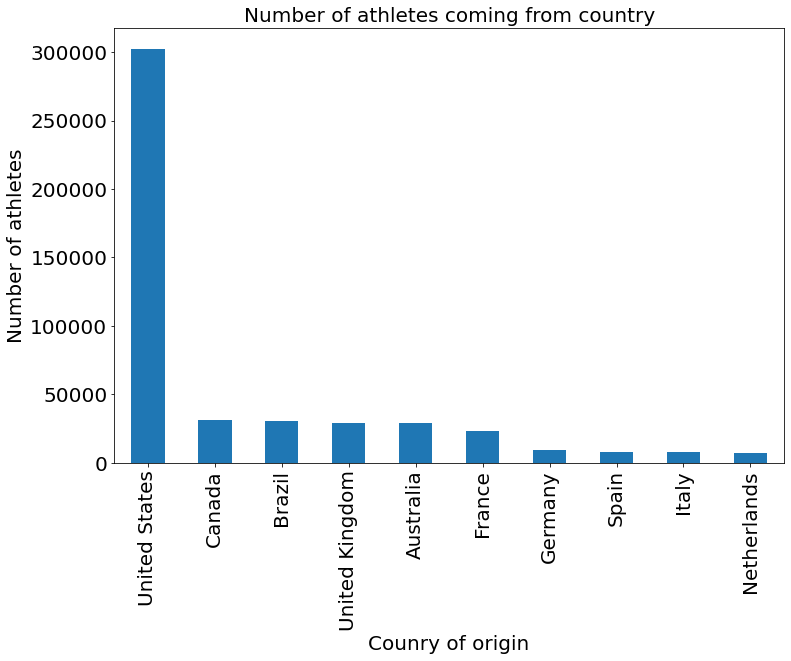

In [65]:
# plot categorical vaiables

#country of origin

countryoforiginname_2019_opens_athletes =df_2019_opens_athletes.groupby('countryoforiginname').competitorname.count()
countryoforiginname_2019_opens_athletes = countryoforiginname_2019_opens_athletes.sort_values(ascending = False)
countryoforiginname_2019_opens_athletes10 = countryoforiginname_2019_opens_athletes.head(10)
countryoforiginname_2019_opens_athletes10.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Counry of origin", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes coming from country", fontsize=20);



Let's analyze the distribution of affiliate gyms. It seems that most of participants don't represent any official affiliate, but many actually train at affiliated gyms. 

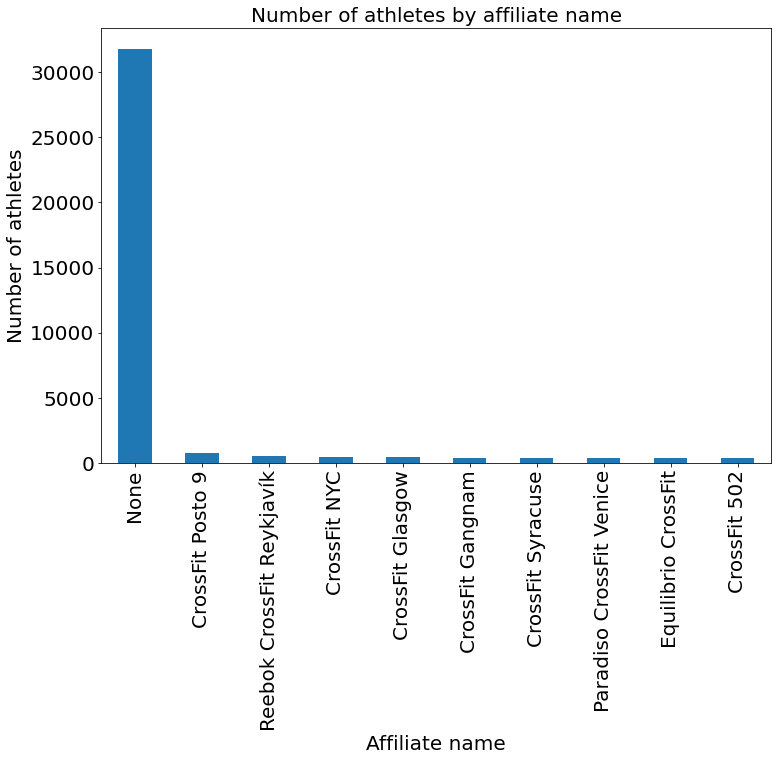

In [66]:
# split by affiliate 

affiliatename_2019_opens_athletes = df_2019_opens_athletes.groupby('affiliatename').division.count()

affiliatename_2019_opens_athletes = affiliatename_2019_opens_athletes.sort_values(ascending = False)
affiliatename_2019_opens_athletes10 = affiliatename_2019_opens_athletes.head(10)
affiliatename_2019_opens_athletes10.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Affiliate name", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes by affiliate name", fontsize=20);


Let's analyze how many athletes competed in scaled (status 1) and non_scaled opens (status 0). It is clear that the majority of athletes do a non-scaled training (status 0). It is worth mentioning that only those who do a non-scaled training (status 0) can qualify for the games.

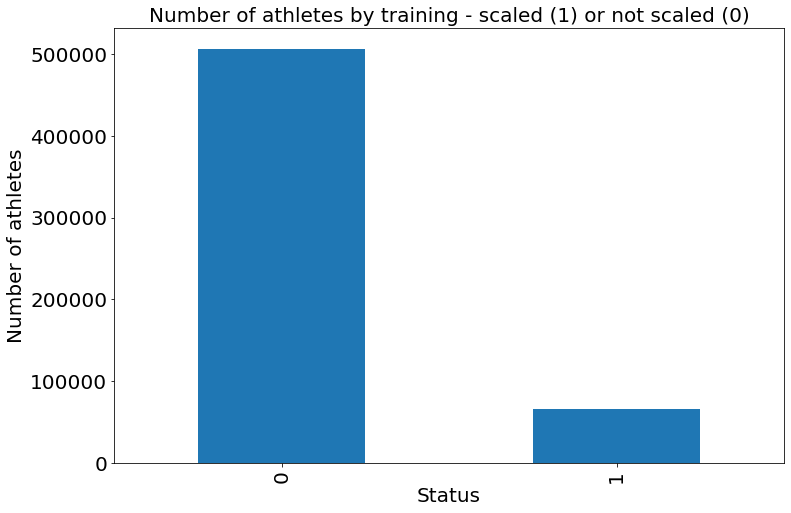

In [67]:
# split by 'is_scaled' 

status_2019_opens_athletes = df_2019_opens_athletes.groupby('is_scaled').competitorname.count()

status_2019_opens_athletes = status_2019_opens_athletes.sort_values(ascending = False)
status_2019_opens_athletes10 = status_2019_opens_athletes.head(10)
status_2019_opens_athletes10.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Status", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes by training - scaled (1) or not scaled (0)", fontsize=20);

Let's see the distribution of athletes by division. The majority compete in the divisions 'men' and 'women'. We are interested in exploring these further. 

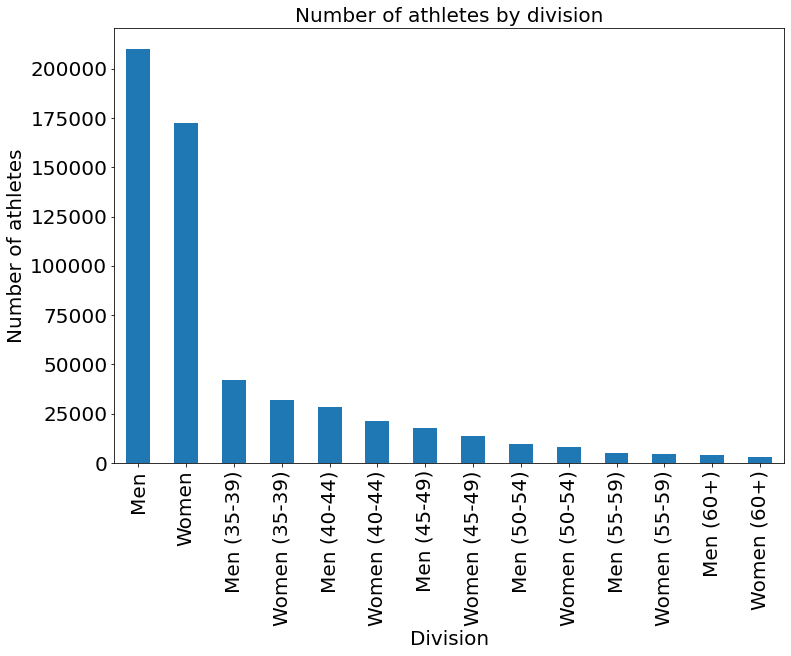

In [68]:
# split by affiliate 

division_2019_opens_athletes = df_2019_opens_athletes.groupby('division').competitorname.count()

division_2019_opens_athletes = division_2019_opens_athletes.sort_values(ascending = False)
division_2019_opens_athletes.plot(kind='bar',stacked = True, figsize=(12, 8), fontsize=20)
plt.xlabel("Division", fontsize=20)
plt.ylabel("Number of athletes", fontsize=20)
plt.title("Number of athletes by division", fontsize=20);

Let's look at the distribution of height by gender - the median for women seems to be ~ 1.7 m while the average for men is closer to 1.8 m (across all divisions).

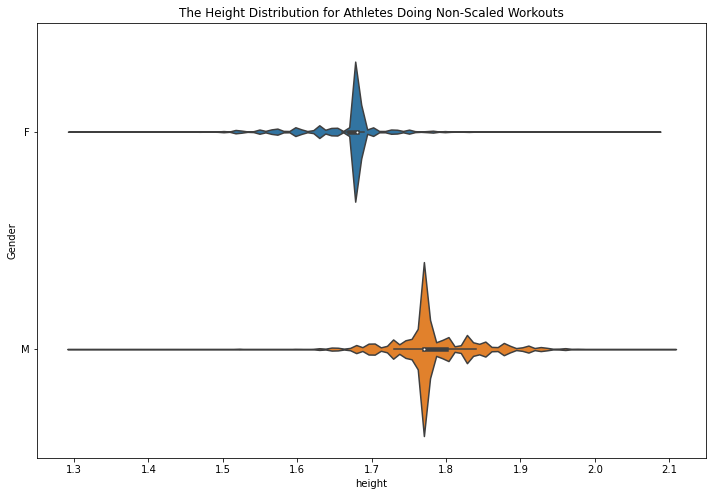

In [69]:
# height for non-scaled

col_val_counts = df_2019_opens_athletes[df_2019_opens_athletes['is_scaled'] == 0]['height'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='gender', x='height', data=df_2019_opens_athletes, orient='h', scale='count', trim=True)
plt.ylabel("Gender")
plt.title('The Height Distribution for Athletes Doing Non-Scaled Workouts')
plt.show() 



Let's look at the weight distribution across the genders - it seems that the median for women is around 65 kg and for men - 85 kg (across all the divisions).

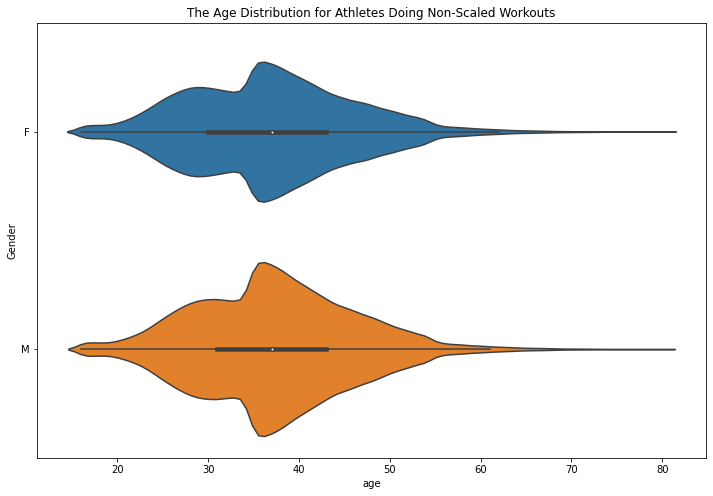

In [70]:
# age of athletes - non-scaled workouts

col_val_counts = df_2019_opens_athletes[df_2019_opens_athletes['is_scaled'] == 0]['age'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='gender', x='age', data=df_2019_opens_athletes, orient='h', scale='count', trim=True)
plt.ylabel("Gender")
plt.title('The Age Distribution for Athletes Doing Non-Scaled Workouts')
plt.show() 

Let's look at the distribution of age across all the divisions. The age distribution seems to be similar between the genders.

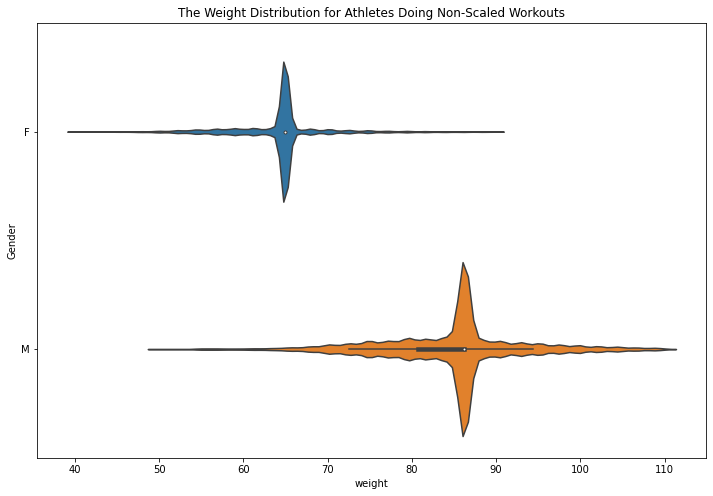

In [71]:
# weight

col_val_counts = df_2019_opens_athletes[df_2019_opens_athletes['is_scaled'] == 0]['weight'].value_counts()
    
plt.figure(figsize=(12,8))
sns.violinplot(y='gender', x='weight', data=df_2019_opens_athletes, orient='h', scale='count', trim=True)
plt.ylabel("Gender")
plt.title('The Weight Distribution for Athletes Doing Non-Scaled Workouts')
plt.show() 

Let's do a final check for the NaNs values.

In [72]:
print(nan_checker(df_2019_opens_athletes))

{'NaNs Exist': False, 'NaN Count': 0, 'NaN Containing Columns': [], 'NaNs More Than 50%': []}


Take a final look at the data set and save it.

In [73]:
opens_2019_athletes_ready = df_2019_opens_athletes 

In [74]:
opens_2019_athletes_ready 

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,Samantha Briggs,Samantha,Briggs,accepted,F,0e63d-P2536_14-184.jpg,GB,United Kingdom,19,4098,CrossFit Black Five,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,Renata Pimentel,Renata,Pimentel,accepted,F,04e97-P485089_5-184.jpg,BR,Brazil,19,15868,CrossFit Gurkha,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,Carleen Mathews,Carleen,Mathews,not accepted,F,b663a-P16973_6-184.jpg,US,United States,19,10471,CrossFit Saint Helens,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,Danila Capaccetti,Danila,Capaccetti,not accepted,F,pukie.png,IT,Italy,19,9329,CrossFit Black Shark,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,Hope Cicero,Hope,Cicero,not accepted,F,f204b-P313257_1-184.jpg,US,United States,19,438,CrossFit Billings,36,1.55,61.23,5,176,0,Women (35-39)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572648,546539,Jean Lyon,Jean,Lyon,not accepted,F,c824f-P546539_1-184.jpg,US,United States,4,231,CrossFit SAC,49,1.68,64.90,2864,11216,1,Women (45-49)
572649,1531656,Lynnell Aoki,Lynnell,Aoki,not accepted,F,pukie.png,US,United States,4,7716,CrossFit Kuleana,48,1.68,64.90,2866,11224,1,Women (45-49)
572650,1338870,Lissa Samudio,Lissa,Samudio,not accepted,F,2d09b-P1338870_1-184.jpg,PY,Paraguay,4,0,None,45,1.68,64.90,2866,11224,1,Women (45-49)
572651,1172138,Darlene Rushing,Darlene,Rushing,not accepted,F,07e0e-P1172138_1-184.jpg,US,United States,4,13232,FireTower CrossFit,49,1.70,70.31,2868,11227,1,Women (45-49)


572,653 rows × 19 columns is the shape of the final 2019 opens athletes data frame.

In [75]:
# opens_2019_athletes_ready.to_csv('opens_2019_athletes_final.csv', index=False)